In [37]:
# ====================================
# 1. Setup & Load Libraries
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:/Users/Hasit/Downloads/german_registry_bystander_vs_nobystander.csv")

print("Original Data Shape:", df.shape)
df.head()

Original Data Shape: (10, 19)


,cpr_group,response_time_bin,n_patients,alarm_arrival,defib_time,vasopressor_time,rosc_ever_pct,rosc_admission_pct,discharged_alive_pct,cpc12_pct,rosc_expected_pct,male_pct,age80plus_pct,public_event_pct,shockable_rhythm_pct,adrenaline_pct,amiodarone_pct,telephone_guided_pct,intubation_pct
0,Bystander CPR,0-2,445,01:04 ± 00:53,06:17 ± 10:35,10:02 ± 04:52,56.0,47.6,22.0,18.4,56.6,67.6,25.8,40.0,42.9,78.9,29.7,21.3,75.3
1,Bystander CPR,3-5,1496,04:11 ± 00:46,08:11 ± 05:35,11:17 ± 05:33,53.3,46.1,20.3,16.6,51.7,66.2,27.7,32.9,41.6,77.9,30.9,29.8,70.0
2,Bystander CPR,6-8,1412,06:53 ± 00:48,09:56 ± 04:40,13:13 ± 05:38,46.4,39.2,15.7,12.8,47.2,70.8,24.4,26.5,38.2,83.1,31.4,34.0,68.1
3,Bystander CPR,9-11,656,09:47 ± 00:47,12:41 ± 04:03,15:48 ± 05:00,46.3,38.9,14.0,10.4,44.5,72.3,23.9,24.4,36.9,84.5,34.5,34.3,71.3
4,Bystander CPR,>12,351,14:03 ± 02:21,14:44 ± 05:37,18:25 ± 07:27,43.3,35.0,13.1,10.3,39.1,69.0,21.1,28.5,30.8,82.9,29.6,29.8,68.7


In [38]:

# ====================================
# 2. Data Preprocessing
# ====================================

# Convert time strings ("MM:SS ± SD") to minutes
def time_to_minutes(t):
    if isinstance(t, str) and ":" in t:
        try:
            base = t.split("±")[0].strip()
            minutes, seconds = map(int, base.split(":"))
            return minutes + seconds/60
        except:
            return np.nan
    return np.nan

for col in ["alarm_arrival", "defib_time", "vasopressor_time"]:
    df[col + "_min"] = df[col].apply(time_to_minutes)

# Convert percentages to decimals
pct_cols = [c for c in df.columns if "_pct" in c]
df[pct_cols] = df[pct_cols] / 100.0

# Encode response_time_bin into numeric midpoint
def bin_to_midpoint(b):
    if "-" in b:
        low, high = map(int, b.split("-"))
        return (low + high) / 2
    elif ">" in b:
        return int(b.replace(">", "")) + 1
    return np.nan

df["response_time_mid"] = df["response_time_bin"].apply(bin_to_midpoint)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

print("After Preprocessing:", df.shape)
df.head()

After Preprocessing: (10, 23)


,cpr_group,response_time_bin,n_patients,alarm_arrival,defib_time,vasopressor_time,rosc_ever_pct,rosc_admission_pct,discharged_alive_pct,cpc12_pct,...,public_event_pct,shockable_rhythm_pct,adrenaline_pct,amiodarone_pct,telephone_guided_pct,intubation_pct,alarm_arrival_min,defib_time_min,vasopressor_time_min,response_time_mid
0,Bystander CPR,0-2,445,01:04 ± 00:53,06:17 ± 10:35,10:02 ± 04:52,0.560,0.476,0.220,0.184,...,0.400,0.429,0.789,0.297,0.213,0.753,1.066667,6.283333,10.033333,1.0
1,Bystander CPR,3-5,1496,04:11 ± 00:46,08:11 ± 05:35,11:17 ± 05:33,0.533,0.461,0.203,0.166,...,0.329,0.416,0.779,0.309,0.298,0.700,4.183333,8.183333,11.283333,4.0
2,Bystander CPR,6-8,1412,06:53 ± 00:48,09:56 ± 04:40,13:13 ± 05:38,0.464,0.392,0.157,0.128,...,0.265,0.382,0.831,0.314,0.340,0.681,6.883333,9.933333,13.216667,7.0
3,Bystander CPR,9-11,656,09:47 ± 00:47,12:41 ± 04:03,15:48 ± 05:00,0.463,0.389,0.140,0.104,...,0.244,0.369,0.845,0.345,0.343,0.713,9.783333,12.683333,15.800000,10.0
4,Bystander CPR,>12,351,14:03 ± 02:21,14:44 ± 05:37,18:25 ± 07:27,0.433,0.350,0.131,0.103,...,0.285,0.308,0.829,0.296,0.298,0.687,14.050000,14.733333,18.416667,13.0


In [29]:
# ====================================
# 2. Data Preprocessing
# ====================================

# Function: Convert time strings ("MM:SS ± SD") to minutes
def time_to_minutes(t):
    if isinstance(t, str) and ":" in t:
        try:
            base = t.split("±")[0].strip()
            minutes, seconds = map(int, base.split(":"))
            return minutes + seconds/60
        except:
            return np.nan
    return np.nan

# Apply to key time columns
for col in ["alarm_arrival", "defib_time", "vasopressor_time"]:
    df[col + "_min"] = df[col].apply(time_to_minutes)

# Convert percentages to decimals (0-1 scale)
pct_cols = [c for c in df.columns if "_pct" in c]
df[pct_cols] = df[pct_cols] / 100.0

# Encode response_time_bin into numeric midpoint
def bin_to_midpoint(b):
    if "-" in b:
        low, high = map(int, b.split("-"))
        return (low + high) / 2
    elif ">" in b:
        return int(b.replace(">", "")) + 1
    return np.nan

df["response_time_mid"] = df["response_time_bin"].apply(bin_to_midpoint)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

print("After Preprocessing:", df.shape)
df.head()

After Preprocessing: (10, 23)


,cpr_group,response_time_bin,n_patients,alarm_arrival,defib_time,vasopressor_time,rosc_ever_pct,rosc_admission_pct,discharged_alive_pct,cpc12_pct,...,public_event_pct,shockable_rhythm_pct,adrenaline_pct,amiodarone_pct,telephone_guided_pct,intubation_pct,alarm_arrival_min,defib_time_min,vasopressor_time_min,response_time_mid
0,Bystander CPR,0-2,445,01:04 ± 00:53,06:17 ± 10:35,10:02 ± 04:52,0.00560,0.00476,0.00220,0.00184,...,0.00400,0.00429,0.00789,0.00297,0.00213,0.00753,1.066667,6.283333,10.033333,1.0
1,Bystander CPR,3-5,1496,04:11 ± 00:46,08:11 ± 05:35,11:17 ± 05:33,0.00533,0.00461,0.00203,0.00166,...,0.00329,0.00416,0.00779,0.00309,0.00298,0.00700,4.183333,8.183333,11.283333,4.0
2,Bystander CPR,6-8,1412,06:53 ± 00:48,09:56 ± 04:40,13:13 ± 05:38,0.00464,0.00392,0.00157,0.00128,...,0.00265,0.00382,0.00831,0.00314,0.00340,0.00681,6.883333,9.933333,13.216667,7.0
3,Bystander CPR,9-11,656,09:47 ± 00:47,12:41 ± 04:03,15:48 ± 05:00,0.00463,0.00389,0.00140,0.00104,...,0.00244,0.00369,0.00845,0.00345,0.00343,0.00713,9.783333,12.683333,15.800000,10.0
4,Bystander CPR,>12,351,14:03 ± 02:21,14:44 ± 05:37,18:25 ± 07:27,0.00433,0.00350,0.00131,0.00103,...,0.00285,0.00308,0.00829,0.00296,0.00298,0.00687,14.050000,14.733333,18.416667,13.0


In [39]:
# ====================================
# 3. Feature Engineering
# ====================================

# 1. Fast response indicator
df["fast_response"] = (df["response_time_mid"] <= 5).astype(int)

# 2. Survival improvement (gap between admission & discharge)
df["survival_gap"] = df["discharged_alive_pct"] - df["rosc_admission_pct"]

# 3. Neurological survival ratio
df["neurological_survival"] = df["cpc12_pct"] / (df["discharged_alive_pct"] + 1e-6)

# 4. Interaction features
df["shockable_x_defib"] = df["shockable_rhythm_pct"] * df["defib_time_min"]
df["telephone_x_response"] = df["telephone_guided_pct"] * df["response_time_mid"]

# 5. One-hot encode CPR group
df = pd.get_dummies(df, columns=["cpr_group"], drop_first=True)

print("After Feature Engineering:", df.shape)
df.head()


After Feature Engineering: (10, 28)


,response_time_bin,n_patients,alarm_arrival,defib_time,vasopressor_time,rosc_ever_pct,rosc_admission_pct,discharged_alive_pct,cpc12_pct,rosc_expected_pct,...,alarm_arrival_min,defib_time_min,vasopressor_time_min,response_time_mid,fast_response,survival_gap,neurological_survival,shockable_x_defib,telephone_x_response,cpr_group_No Bystander CPR
0,0-2,445,01:04 ± 00:53,06:17 ± 10:35,10:02 ± 04:52,0.560,0.476,0.220,0.184,0.566,...,1.066667,6.283333,10.033333,1.0,1,-0.256,0.836360,2.695550,0.213,False
1,3-5,1496,04:11 ± 00:46,08:11 ± 05:35,11:17 ± 05:33,0.533,0.461,0.203,0.166,0.517,...,4.183333,8.183333,11.283333,4.0,1,-0.258,0.817730,3.404267,1.192,False
2,6-8,1412,06:53 ± 00:48,09:56 ± 04:40,13:13 ± 05:38,0.464,0.392,0.157,0.128,0.472,...,6.883333,9.933333,13.216667,7.0,0,-0.235,0.815281,3.794533,2.380,False
3,9-11,656,09:47 ± 00:47,12:41 ± 04:03,15:48 ± 05:00,0.463,0.389,0.140,0.104,0.445,...,9.783333,12.683333,15.800000,10.0,0,-0.249,0.742852,4.680150,3.430,False
4,>12,351,14:03 ± 02:21,14:44 ± 05:37,18:25 ± 07:27,0.433,0.350,0.131,0.103,0.391,...,14.050000,14.733333,18.416667,13.0,0,-0.219,0.786254,4.537867,3.874,False


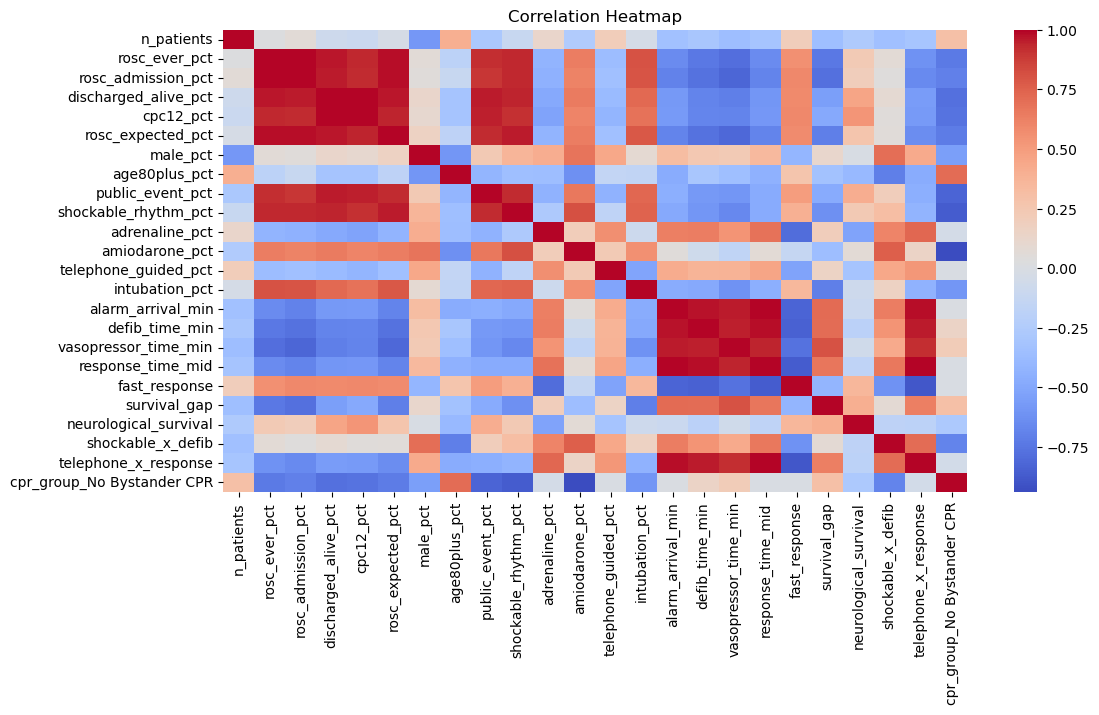

ValueError: Could not interpret value `cpr_group_No bystander CPR` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [47]:

# ====================================
# 4. Exploratory Data Analysis (EDA)
# ====================================

# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Response Time vs Survival
plt.figure(figsize=(8,5))
sns.barplot(x="response_time_mid", y="discharged_alive_pct", hue="cpr_group_No bystander CPR", data=df)
plt.title("Survival Rate vs Response Time")
plt.ylabel("Discharged Alive (fraction)")
plt.xlabel("Response Time (min)")
plt.show()

In [50]:
# ====================================
# 5. Prepare Data for Modeling
# ====================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features and Target
X = df.drop(columns=["discharged_alive_pct", "response_time_bin", "alarm_arrival", "defib_time", "vasopressor_time"])
y = df["discharged_alive_pct"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

R² Score: 0.3912976783377876
MSE: 0.001962862086586748


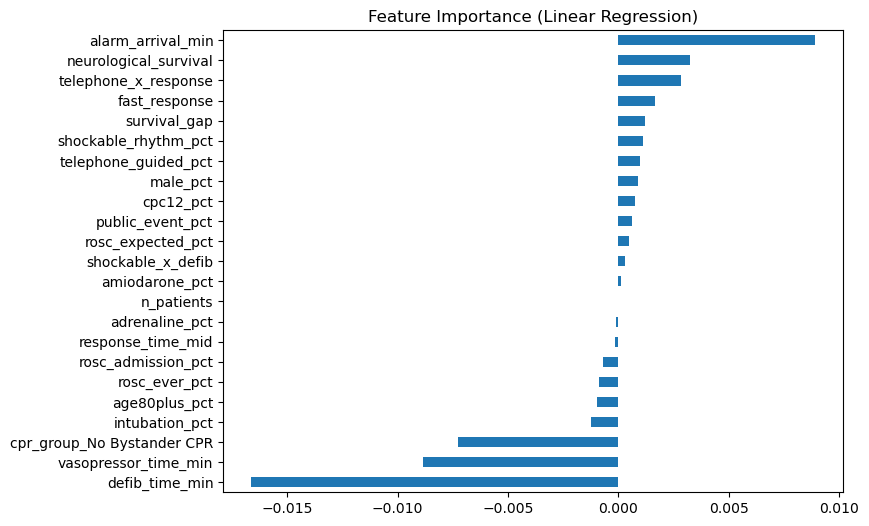

In [49]:

# ====================================
# 6. Regression Model Example
# ====================================
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Show feature importance
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Linear Regression)")
plt.show()

In [48]:
# Save the cleaned + engineered dataset
df.to_csv("german_registry_processed.csv", index=False)

print("✅ Processed dataset saved as german_registry_processed.csv")


✅ Processed dataset saved as german_registry_processed.csv
